In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [24]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

In [2]:
import matplotlib.pyplot as plt

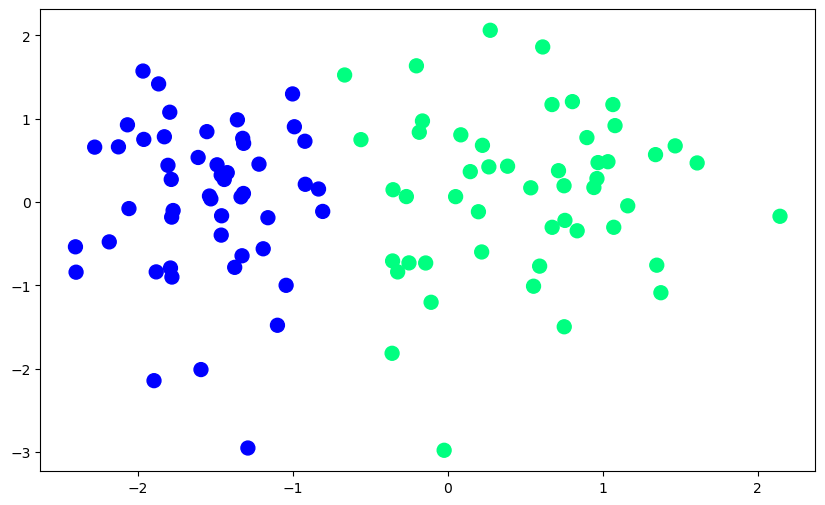

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [42]:
def perceptron(X,y):

    # Adding a bias column to the X. We had two columns for X, and now we added the bias. 
    # The bias column has all the values set to 1
    X = np.insert(X,0,1,axis=1)  

    # Here we are creating the weight and shape of the weight is same as that of the X. 
    # That is X has 3 column including two feature and one bias, so Weight also have 3 columns.
    weights = np.ones(X.shape[1])

    # lr is the learning rate
    lr = 0.1

    # 1000 is th epoch
    for i in range(1000):

        # randonly selecting a point, between 0 to 100. Beacsause X.Shape is (100, 3) with the bias column
        # Suppose j = 41
        j = np.random.randint(0,100)

        # y_hat is the prediction made by our model. We calculate the dot product of X with W, that is w1x1 + w2x2+... 
        # X and weigth will have always the same number of columns
        # That is , np.dot(np.insert(X[41], 0, 1),[1, 1, 1])
        # Than we have step function, that check if the value +ve if returns 1, adn if -v1 it returs -1
        y_hat = step(np.dot(X[j],weights))

        # Now we are updating the weigthts based on the prediction that we get from the above code
        weights = weights + lr * (y[j]-y_hat) * X[j]

        # Where:
        # lr = 0.1: Learning rate that controls the size of the weight updates.
        # y[j]: The actual label for the randomly selected sample.
        # y_hat: The prediction made by the model (+1 or -1).
        # X[j]: The randomly selected sample's feature vector, including the bias term.

    # Here we are returning the intercept that is w0 that is bias as weights[0]
    # Also, we are returning all the coeff like, w1, w2 and so on that is by doing, weights[1:]
    # so, out weights will be an array of 3 elements, [1.0, 1.30832655 0.06199258]
    # The first element will be bias or intercept. This bias ensures that your perceptron can create a more flexible decision boundary, 
    # not restricted to passing through the origin.
    # And all the remaining elements will be the coefficeint
    return weights[0],weights[1:]

In [8]:
def step(z):
    return 1 if z>0 else 0

In [46]:
intercept_,coef_ = perceptron(X,y)
print(perceptron(X,y))

(1.0, array([1.36140303, 0.10997392]))


In [44]:
print(coef_)
print(intercept_)

[1.30832655 0.06199258]
1.0


In [15]:
m = -(coef_[0]/coef_[1]) # slope (m) = -A/B
b = -(intercept_/coef_[1]) # y-intercept (b) = -(intercept_)/B

In [17]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

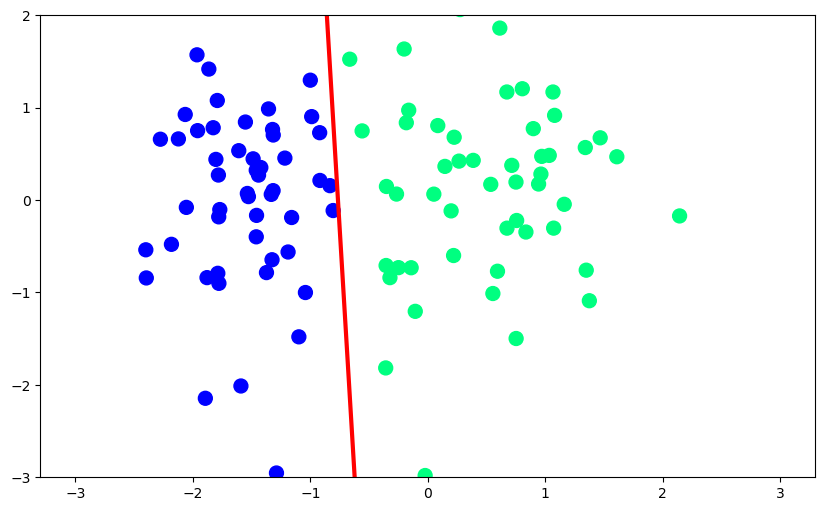

In [48]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)